Before getting started, copy flu_2016_2017.csv, hhcaps.csv into COLAB. Adjust file paths as necessary.

### Books on Business Graphics

Wall Street Journal Guide to Information Graphics by Dona Wong

https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281

---

* Exploratory plots with pandas
  * Histograms
  * Scatter Plots
  
* Descriptive and presentable plots with matplotlib
  * Multiple plots per figure
  * Adjusting axes and formatting

---

Use `%matplotlib notebook` to make plots interactive

In [24]:
%matplotlib inline

Plotting from pandas
---

In [25]:
import pandas as pd
data = pd.read_csv('flu_2016_2017.csv', quotechar='"')
usa = data[(data['Country'] == 'United States of America') & 
           (data['Year'] == 2016)]
usa.shape

(52, 22)

In [26]:
data[0:2]

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2016,1,2016-01-04,2016-01-10,87.0,87.0,0.0,...,0.0,2.0,13,0.0,0.0,0.0,0,13,NaN,Sporadic
1,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2016,2,2016-01-11,2016-01-17,70.0,70.0,0.0,...,0.0,3.0,3,0.0,0.0,1.0,1,4,NaN,Sporadic


In [27]:
usa.dtypes

Country               object
WHOREGION             object
FLUREGION             object
Year                   int64
Week                   int64
SDATE                 object
EDATE                 object
SPEC_RECEIVED_NB     float64
SPEC_PROCESSED_NB    float64
AH1                  float64
AH1N12009            float64
AH3                  float64
AH5                  float64
ANOTSUBTYPED         float64
INF_A                  int64
BYAMAGATA            float64
BVICTORIA            float64
BNOTDETERMINED       float64
INF_B                  int64
ALL_INF                int64
ALL_INF2             float64
TITLE                 object
dtype: object

In [28]:
usa[0:1]

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
8295,United States of America,Region of the Americas of WHO,North America,2016,1,2016-01-04,2016-01-10,21578.0,21578.0,0.0,...,0.0,398.0,697,52.0,12.0,198.0,262,959,0.0,No Report


In [29]:
country_filter = data['Country'] == 'United States of America'

In [30]:
country_filter.head()

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool

In [31]:
data[country_filter].head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
8295,United States of America,Region of the Americas of WHO,North America,2016,1,2016-01-04,2016-01-10,21578.0,21578.0,0.0,...,0.0,398.0,697,52.0,12.0,198.0,262,959,0.0,No Report
8296,United States of America,Region of the Americas of WHO,North America,2016,2,2016-01-11,2016-01-17,20415.0,20415.0,0.0,...,0.0,576.0,921,60.0,23.0,269.0,352,1273,0.0,No Report
8297,United States of America,Region of the Americas of WHO,North America,2016,3,2016-01-18,2016-01-24,20701.0,20701.0,0.0,...,0.0,729.0,1189,83.0,25.0,360.0,468,1657,0.0,No Report
8298,United States of America,Region of the Americas of WHO,North America,2016,4,2016-01-25,2016-01-31,23301.0,23301.0,0.0,...,0.0,1049.0,1734,104.0,28.0,508.0,640,2374,0.0,No Report
8299,United States of America,Region of the Americas of WHO,North America,2016,5,2016-02-01,2016-02-07,24925.0,24925.0,0.0,...,0.0,1585.0,2428,143.0,62.0,684.0,889,3317,0.0,No Report


In [32]:
filter_year = data['Year'] == 2016

In [33]:
filter_year.head()

0    True
1    True
2    True
3    True
4    True
Name: Year, dtype: bool

In [34]:
(filter_year | country_filter).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [35]:
filter_big = data['SPEC_RECEIVED_NB'] > 21000

In [36]:
data[(filter_year & country_filter & filter_big)]

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
8295,United States of America,Region of the Americas of WHO,North America,2016,1,2016-01-04,2016-01-10,21578.0,21578.0,0.0,...,0.0,398.0,697,52.0,12.0,198.0,262,959,0.0,No Report
8298,United States of America,Region of the Americas of WHO,North America,2016,4,2016-01-25,2016-01-31,23301.0,23301.0,0.0,...,0.0,1049.0,1734,104.0,28.0,508.0,640,2374,0.0,No Report
8299,United States of America,Region of the Americas of WHO,North America,2016,5,2016-02-01,2016-02-07,24925.0,24925.0,0.0,...,0.0,1585.0,2428,143.0,62.0,684.0,889,3317,0.0,No Report
8300,United States of America,Region of the Americas of WHO,North America,2016,6,2016-02-08,2016-02-14,28055.0,28055.0,0.0,...,0.0,2280.0,3407,206.0,71.0,1020.0,1297,4704,0.0,No Report
8301,United States of America,Region of the Americas of WHO,North America,2016,7,2016-02-15,2016-02-21,31036.0,31036.0,0.0,...,0.0,3151.0,4747,309.0,103.0,1271.0,1683,6430,0.0,No Report
8302,United States of America,Region of the Americas of WHO,North America,2016,8,2016-02-22,2016-02-28,35463.0,35463.0,0.0,...,0.0,4434.0,6337,383.0,156.0,1486.0,2025,8362,0.0,No Report
8303,United States of America,Region of the Americas of WHO,North America,2016,9,2016-02-29,2016-03-06,38488.0,38488.0,0.0,...,0.0,5554.0,7753,347.0,143.0,1836.0,2326,10079,0.0,No Report
8304,United States of America,Region of the Americas of WHO,North America,2016,10,2016-03-07,2016-03-13,41810.0,41810.0,0.0,...,0.0,6725.0,9211,333.0,162.0,2264.0,2759,11970,0.0,No Report
8305,United States of America,Region of the Americas of WHO,North America,2016,11,2016-03-14,2016-03-20,38269.0,38269.0,0.0,...,0.0,5070.0,6795,278.0,154.0,1972.0,2404,9199,0.0,No Report
8306,United States of America,Region of the Americas of WHO,North America,2016,12,2016-03-21,2016-03-27,33466.0,33466.0,0.0,...,0.0,3938.0,5194,207.0,117.0,1835.0,2159,7353,0.0,No Report


In [37]:
data.query('Country == "United States of America" & Year == 2016 & SPEC_RECEIVED_NB > 22000')

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
8298,United States of America,Region of the Americas of WHO,North America,2016,4,2016-01-25,2016-01-31,23301.0,23301.0,0.0,...,0.0,1049.0,1734,104.0,28.0,508.0,640,2374,0.0,No Report
8299,United States of America,Region of the Americas of WHO,North America,2016,5,2016-02-01,2016-02-07,24925.0,24925.0,0.0,...,0.0,1585.0,2428,143.0,62.0,684.0,889,3317,0.0,No Report
8300,United States of America,Region of the Americas of WHO,North America,2016,6,2016-02-08,2016-02-14,28055.0,28055.0,0.0,...,0.0,2280.0,3407,206.0,71.0,1020.0,1297,4704,0.0,No Report
8301,United States of America,Region of the Americas of WHO,North America,2016,7,2016-02-15,2016-02-21,31036.0,31036.0,0.0,...,0.0,3151.0,4747,309.0,103.0,1271.0,1683,6430,0.0,No Report
8302,United States of America,Region of the Americas of WHO,North America,2016,8,2016-02-22,2016-02-28,35463.0,35463.0,0.0,...,0.0,4434.0,6337,383.0,156.0,1486.0,2025,8362,0.0,No Report
8303,United States of America,Region of the Americas of WHO,North America,2016,9,2016-02-29,2016-03-06,38488.0,38488.0,0.0,...,0.0,5554.0,7753,347.0,143.0,1836.0,2326,10079,0.0,No Report
8304,United States of America,Region of the Americas of WHO,North America,2016,10,2016-03-07,2016-03-13,41810.0,41810.0,0.0,...,0.0,6725.0,9211,333.0,162.0,2264.0,2759,11970,0.0,No Report
8305,United States of America,Region of the Americas of WHO,North America,2016,11,2016-03-14,2016-03-20,38269.0,38269.0,0.0,...,0.0,5070.0,6795,278.0,154.0,1972.0,2404,9199,0.0,No Report
8306,United States of America,Region of the Americas of WHO,North America,2016,12,2016-03-21,2016-03-27,33466.0,33466.0,0.0,...,0.0,3938.0,5194,207.0,117.0,1835.0,2159,7353,0.0,No Report
8307,United States of America,Region of the Americas of WHO,North America,2016,13,2016-03-28,2016-04-03,30622.0,30622.0,0.0,...,0.0,2996.0,3983,211.0,127.0,1720.0,2058,6041,0.0,No Report


---

Histogram
---

Plot a histogram of the number of Influenza B cases per week

In [38]:
usa

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
8295,United States of America,Region of the Americas of WHO,North America,2016,1,2016-01-04,2016-01-10,21578.0,21578.0,0.0,...,0.0,398.0,697,52.0,12.0,198.0,262,959,0.0,No Report
8296,United States of America,Region of the Americas of WHO,North America,2016,2,2016-01-11,2016-01-17,20415.0,20415.0,0.0,...,0.0,576.0,921,60.0,23.0,269.0,352,1273,0.0,No Report
8297,United States of America,Region of the Americas of WHO,North America,2016,3,2016-01-18,2016-01-24,20701.0,20701.0,0.0,...,0.0,729.0,1189,83.0,25.0,360.0,468,1657,0.0,No Report
8298,United States of America,Region of the Americas of WHO,North America,2016,4,2016-01-25,2016-01-31,23301.0,23301.0,0.0,...,0.0,1049.0,1734,104.0,28.0,508.0,640,2374,0.0,No Report
8299,United States of America,Region of the Americas of WHO,North America,2016,5,2016-02-01,2016-02-07,24925.0,24925.0,0.0,...,0.0,1585.0,2428,143.0,62.0,684.0,889,3317,0.0,No Report
8300,United States of America,Region of the Americas of WHO,North America,2016,6,2016-02-08,2016-02-14,28055.0,28055.0,0.0,...,0.0,2280.0,3407,206.0,71.0,1020.0,1297,4704,0.0,No Report
8301,United States of America,Region of the Americas of WHO,North America,2016,7,2016-02-15,2016-02-21,31036.0,31036.0,0.0,...,0.0,3151.0,4747,309.0,103.0,1271.0,1683,6430,0.0,No Report
8302,United States of America,Region of the Americas of WHO,North America,2016,8,2016-02-22,2016-02-28,35463.0,35463.0,0.0,...,0.0,4434.0,6337,383.0,156.0,1486.0,2025,8362,0.0,No Report
8303,United States of America,Region of the Americas of WHO,North America,2016,9,2016-02-29,2016-03-06,38488.0,38488.0,0.0,...,0.0,5554.0,7753,347.0,143.0,1836.0,2326,10079,0.0,No Report
8304,United States of America,Region of the Americas of WHO,North America,2016,10,2016-03-07,2016-03-13,41810.0,41810.0,0.0,...,0.0,6725.0,9211,333.0,162.0,2264.0,2759,11970,0.0,No Report


<AxesSubplot:>

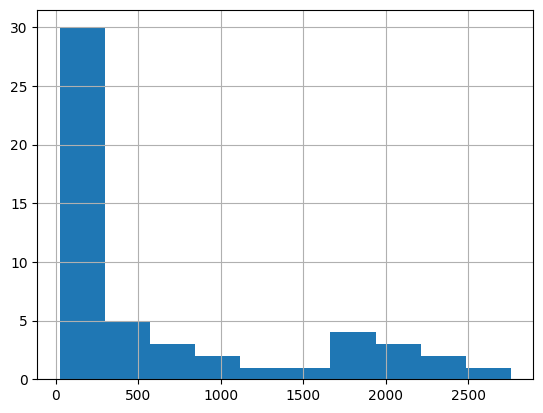

In [39]:
usa['INF_B'].hist()

array([[<AxesSubplot:title={'center':'INF_B'}>,
        <AxesSubplot:title={'center':'INF_A'}>],
       [<AxesSubplot:title={'center':'SPEC_RECEIVED_NB'}>,
        <AxesSubplot:>]], dtype=object)

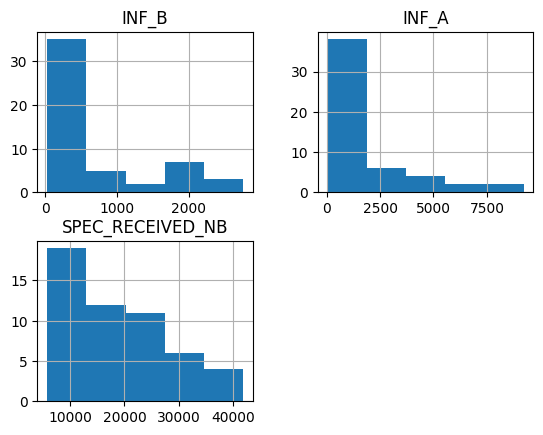

In [40]:
usa[['INF_B','INF_A','SPEC_RECEIVED_NB']].hist(bins=5)


---

Line Plot (default)
---

Plot the number of cases by week

In [41]:
%%bash 
pip install seaborn

<AxesSubplot:xlabel='SDATE'>

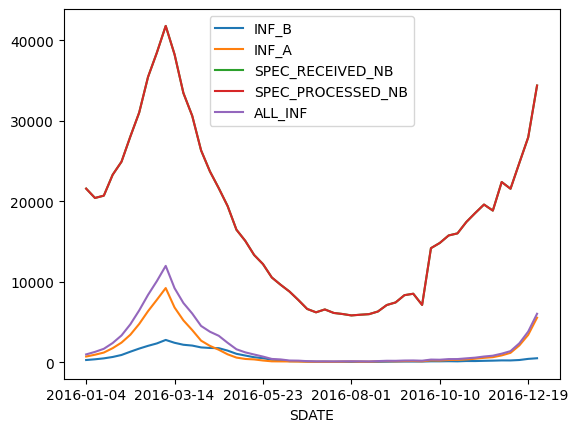

In [42]:
import seaborn as sns
usa.plot(x='SDATE', y=['INF_B','INF_A','SPEC_RECEIVED_NB','SPEC_PROCESSED_NB', 'ALL_INF'])

<AxesSubplot:xlabel='SDATE'>

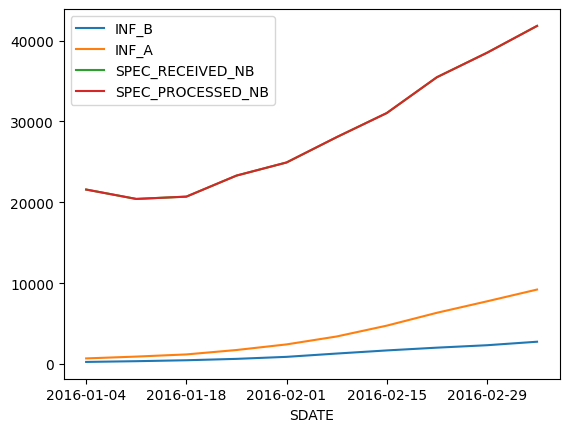

In [43]:
usa[0:10].plot(x='SDATE', y=['INF_B','INF_A','SPEC_RECEIVED_NB','SPEC_PROCESSED_NB'])

---

Scatter Plot
---

Use a scatter plot to see if there are some possible relationship

Text(0.5, 0, 'Specimens Received')

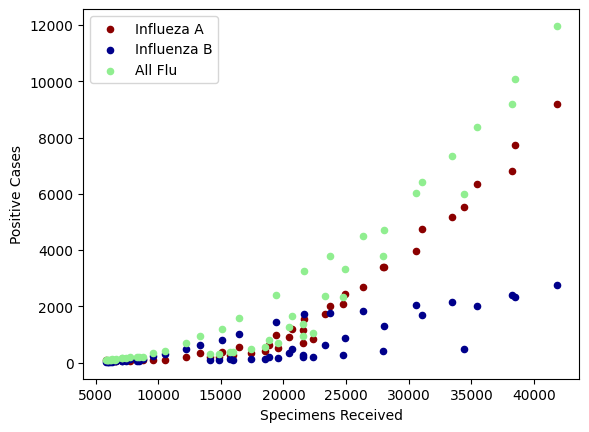

In [44]:
axes = usa.plot.scatter(x='SPEC_RECEIVED_NB', y='INF_A', color='DarkRed', label='Influeza A')
axes = usa.plot.scatter(x='SPEC_RECEIVED_NB', y='INF_B', color='DarkBlue', label='Influenza B', ax=axes)
axes = usa.plot.scatter(x='SPEC_RECEIVED_NB', y='ALL_INF', color='LightGreen', label='All Flu', ax=axes)

axes.set_ylabel('Positive Cases')
axes.set_xlabel('Specimens Received')

Text(0.5, 0, 'Specimens Received')

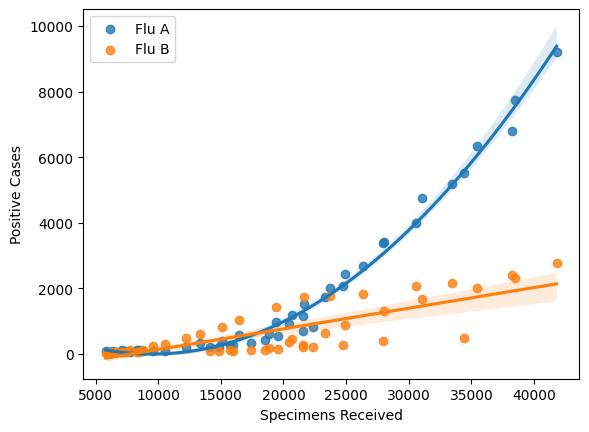

In [45]:
import seaborn as sns
ax = sns.regplot(data=usa, x='SPEC_RECEIVED_NB', y='INF_A', order=2, label='Flu A')
sns.regplot(data=usa, x='SPEC_RECEIVED_NB', y='INF_B', label='Flu B', ax=ax)
ax.legend()
ax.set_ylabel('Positive Cases')
ax.set_xlabel('Specimens Received')

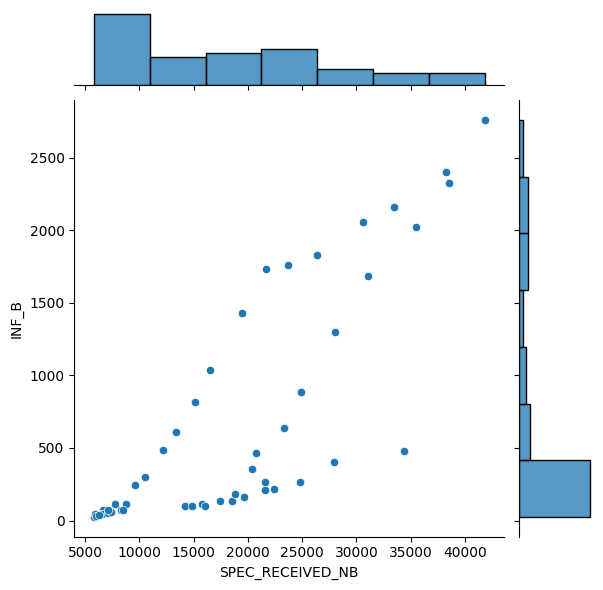

In [46]:
import seaborn as sns
ax = sns.jointplot(data=usa, x='SPEC_RECEIVED_NB', y='INF_B')


---

See if there are always a similar ratio of type A to type B cases of influenza

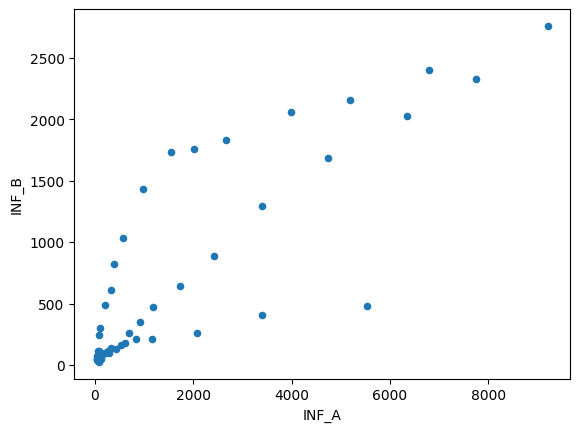

In [47]:
ax = usa.plot.scatter(x='INF_A', y='INF_B')

Other Examples
===

Plot by State
---

In [48]:
%matplotlib inline

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('hhcaps.csv', quotechar='"')
d.replace(to_replace='Not Available', value=0, inplace=True)
d = d[d['State'].isin(['CA','IL','WY'])]
by_state = d.groupby('State')

In [ ]:
d.head()

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
497,CA,57031,SUTTER VISITING NURSE ASSOCIATION ...,"100 ROWLAND WAY, SUITE 215 ...",NOVATO,94945,4152097700,Visiting Nurse Association,True,True,...,3.0,NaN,85,NaN,82,NaN,489,NaN,31,NaN
498,CA,57033,UCSF HOME HEALTH CARE ...,"3360 GEARY BLVD, STE 201 ...",SAN FRANCISCO,94118,4153533100,Hospital Based Program,True,True,...,2.0,NaN,76,NaN,75,NaN,175,NaN,24,NaN
504,CA,57203,GENTIVA HEALTH SERVICES ...,3220 S HIGUERA ST STE 101 ...,SAN LUIS OBISPO,93401,8055444402,Local,True,True,...,4.0,NaN,90,NaN,87,NaN,200,NaN,37,NaN
510,CA,57205,ST. ELIZABETH COMM HOSP HHA ...,1425 VISTA WAY ...,RED BLUFF,96080,5302454040,Hospital Based Program,True,True,...,3.0,NaN,84,NaN,80,NaN,152,NaN,26,NaN
525,CA,57212,ST JOSEPH'S MEDICAL CENTER HOME HEALTH ...,"509 W WEBER AVE, SUITE 200 ...",STOCKTON,95203,2094736700,Hospital Based Program,True,True,...,3.0,NaN,87,NaN,82,NaN,337,NaN,26,NaN


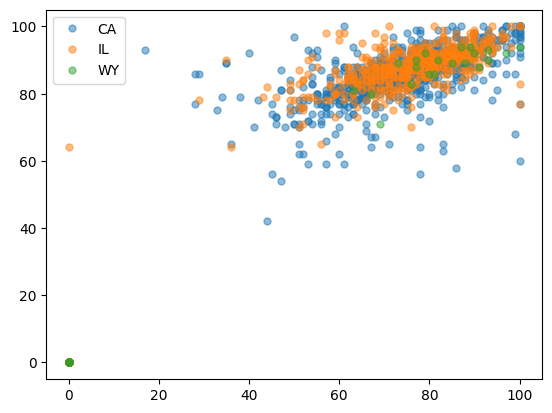

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in by_state:
    recommend = group['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)
    professional = group['Percent of patients who reported that their home health team gave care in a professional way'].astype(float)
    ax.plot(recommend, professional, marker='o', linestyle='', ms=5, alpha=0.5, label=name)
ax.legend()

plt.show()

Time Series Plots
---

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


d = pd.read_csv('hhcaps.csv', quotechar='"')
d = d[d['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'] != 'Not Available']
#d.replace(to_replace='Not Available', value=0, inplace=True)


In [ ]:
d.dtypes

State                                                                                                                                 object
CMS Certification Number (CCN)*                                                                                                        int64
Provider Name                                                                                                                         object
Address                                                                                                                               object
City                                                                                                                                  object
Zip                                                                                                                                    int64
Phone                                                                                                                                  int64
Type of Owner

In [ ]:
d['Date Certified'].head()

1    1972-10-01 00:00:00
2    1973-01-18 00:00:00
3    1975-07-24 00:00:00
4    1975-09-04 00:00:00
5    1976-06-09 00:00:00
Name: Date Certified, dtype: object

<AxesSubplot:xlabel='Year Certified'>

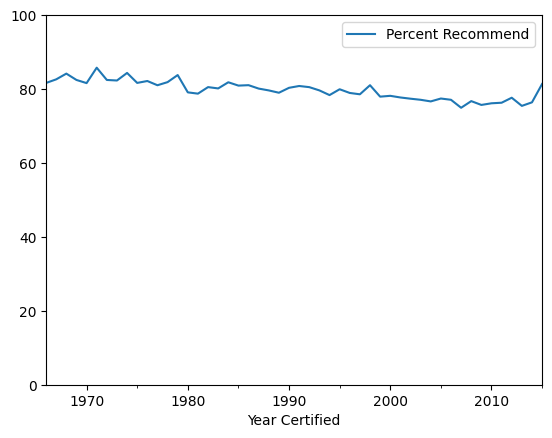

In [54]:
data = pd.DataFrame()
data['Year Certified'] = pd.to_datetime(d['Date Certified'].str[0:4] + '-01-01', format='%Y-%m-%d')
data['Percent Recommend'] = d['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)


g = data.groupby(['Year Certified']).mean().plot(style='-')
g.set_ylim(0,100)
g

(0.0, 100.0)

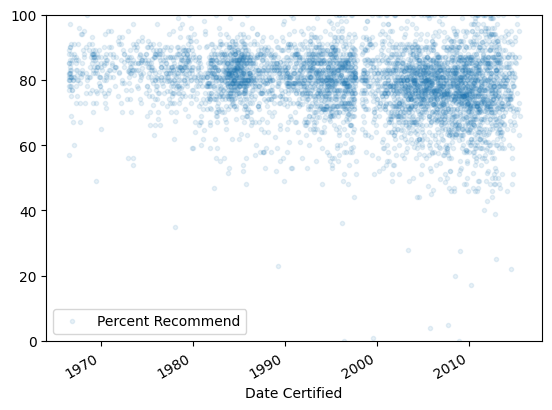

In [55]:
data = pd.DataFrame()
data['Date Certified'] = pd.to_datetime(d['Date Certified'], format='%Y-%m-%d')
data['Percent Recommend'] = d['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)

g = data.groupby(['Date Certified']).mean().plot(style='.', alpha=.1)
g.set_ylim(0,100)

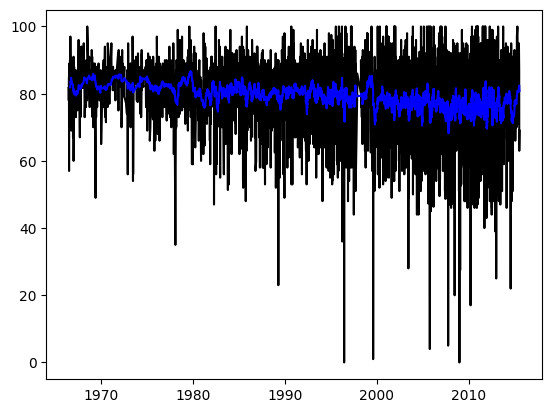

In [56]:
recommend = pd.DataFrame()
recommend['Date Certified'] = pd.to_datetime(d['Date Certified'], format='%Y-%m-%d')
recommend['Percent Recommend'] = d['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)

data = recommend.groupby(['Date Certified']).mean()

ma = data.rolling(20).mean()

mstd = data.rolling(20).std()

plt.figure()

plt.plot(data.index, data, 'k')

plt.plot(ma.index, ma, 'b')

#plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)
